In [1]:
import yfinance as yf
import pandas as pd

In [2]:
# Definir los símbolos de los índices
sp500_ticker = "^GSPC" # S&P 500
ibex35_ticker = "^IBEX" # IBEX 35
# Definir el rango de fechas
start_date = "2000-01-01"
end_date = "2024-01-01"
# Descargar los datos históricos desde Yahoo Finance
sp500_data = yf.download(sp500_ticker, start=start_date, end=end_date)
ibex35_data = yf.download(ibex35_ticker, start=start_date, end=end_date)
# Mostrar las primeras filas de cada dataset
print("S&P 500 Data:")
print(sp500_data.head())
print("\nIBEX 35 Data:")
print(ibex35_data.head())
# Guardar los datos en CSV (opcional)
sp500_data.to_csv("sp500_data.csv")
ibex35_data.to_csv("ibex35_data.csv")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

S&P 500 Data:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2000-01-03  1455.219971  1478.000000  1438.359985  1469.250000   931800000
2000-01-04  1399.420044  1455.219971  1397.430054  1455.219971  1009000000
2000-01-05  1402.109985  1413.270020  1377.680054  1399.420044  1085500000
2000-01-06  1403.449951  1411.900024  1392.099976  1402.109985  1092300000
2000-01-07  1441.469971  1441.469971  1400.729980  1403.449951  1225200000

IBEX 35 Data:
Price              Close          High           Low          Open Volume
Ticker             ^IBEX         ^IBEX         ^IBEX         ^IBEX  ^IBEX
Date                                                                     
2000-01-03  11609.988281  11881.787812  11574.388708  11641.388640      0
2000-01-04  11206.587891  11529.987943  11159.788135  11529.987943      0
2

In [7]:
# Rutas de los CSV
sp500_path = "data/ibex35_data.csv"
ibex35_path = "data//ibex35_data.csv"

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los archivos CSV
df_sp500 = pd.read_csv(sp500_path, index_col=0, parse_dates=True)
df_ibex35 = pd.read_csv(ibex35_path, index_col=0, parse_dates=True)

# Eliminar la primera fila que contenía "Ticker"
df_sp500 = df_sp500.iloc[1:].copy()
df_ibex35 = df_ibex35.iloc[1:].copy()

# Convertir las columnas a tipo float
columns_to_convert = ["Close", "High", "Low", "Open", "Volume"]
for col in columns_to_convert:
    df_sp500[col] = pd.to_numeric(df_sp500[col], errors="coerce")
    df_ibex35[col] = pd.to_numeric(df_ibex35[col], errors="coerce")

# Interpolación lineal para manejar valores faltantes
df_sp500.interpolate(method='linear', inplace=True)
df_ibex35.interpolate(method='linear', inplace=True)

# Eliminar filas con valores nulos restantes
df_sp500.dropna(inplace=True)
df_ibex35.dropna(inplace=True)

C:\Users\bruno\AppData\Local\Temp\ipykernel_5848\378616677.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sp500 = pd.read_csv(sp500_path, index_col=0, parse_dates=True)
C:\Users\bruno\AppData\Local\Temp\ipykernel_5848\378616677.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ibex35 = pd.read_csv(ibex35_path, index_col=0, parse_dates=True)


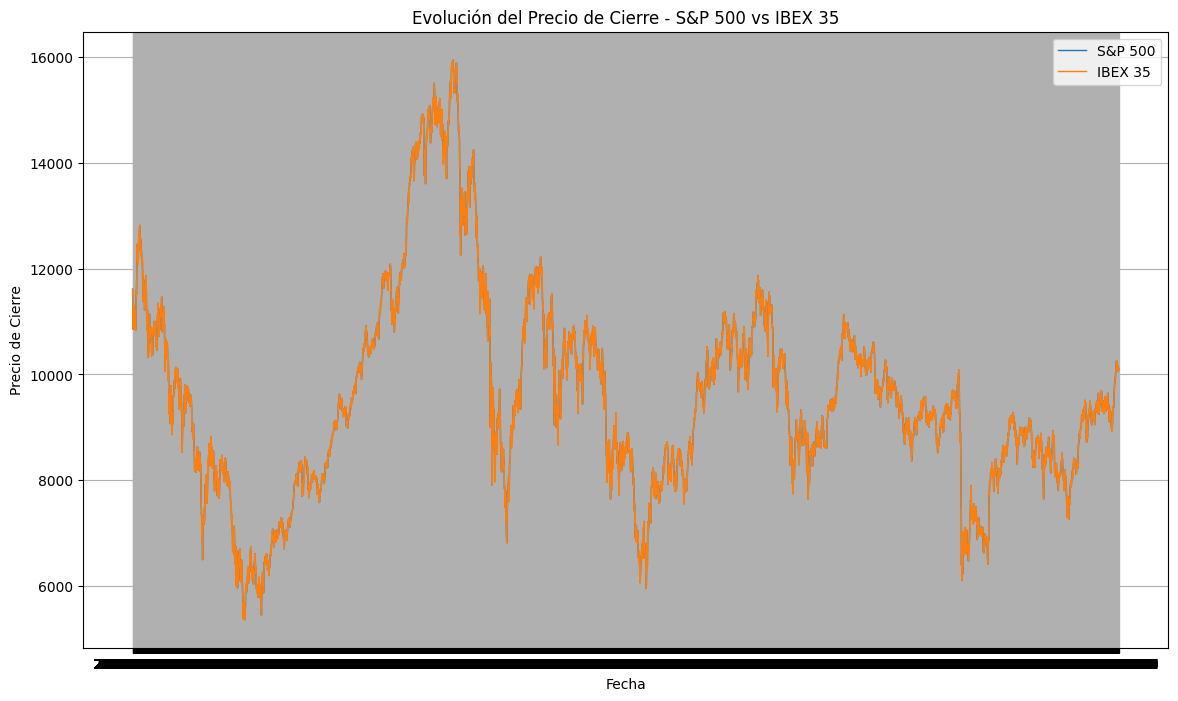

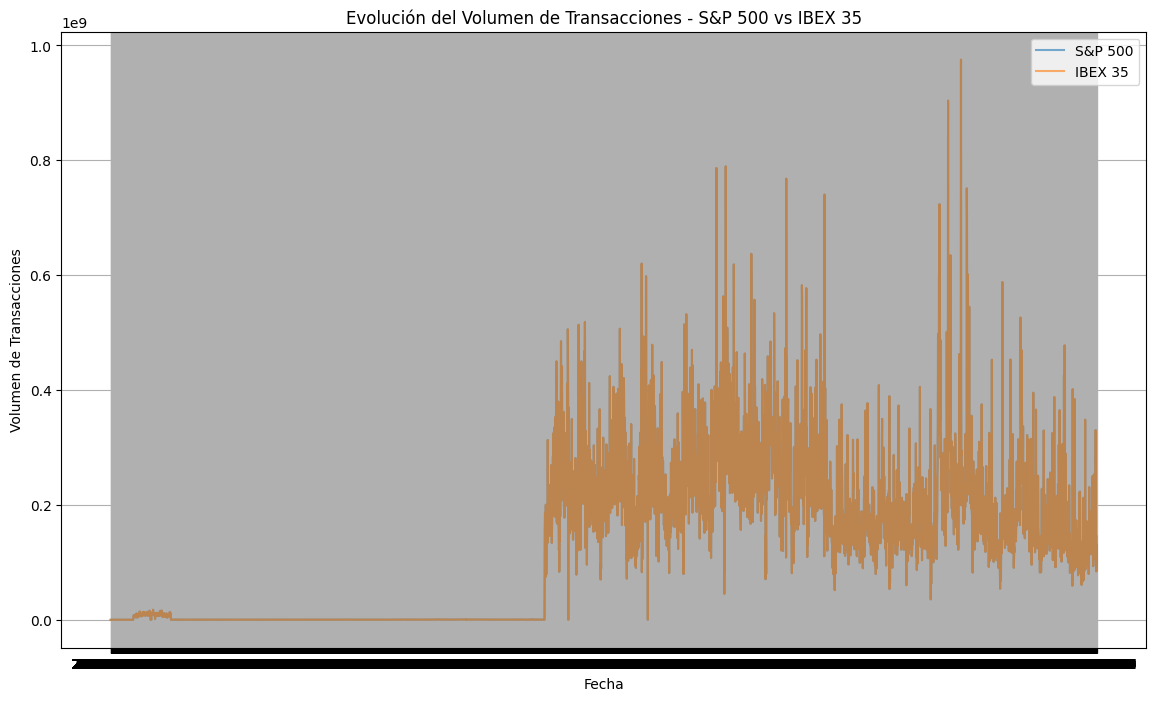

In [14]:

# Visualización con Matplotlib
plt.figure(figsize=(14, 8))
plt.plot(df_sp500.index, df_sp500["Close"], label="S&P 500", linewidth=1)
plt.plot(df_ibex35.index, df_ibex35["Close"], label="IBEX 35", linewidth=1)
plt.xlabel("Fecha")
plt.ylabel("Precio de Cierre")
plt.title("Evolución del Precio de Cierre - S&P 500 vs IBEX 35")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14, 8))
plt.plot(df_sp500.index, df_sp500["Volume"], label="S&P 500", alpha=0.6)
plt.plot(df_ibex35.index, df_ibex35["Volume"], label="IBEX 35", alpha=0.6)
plt.xlabel("Fecha")
plt.ylabel("Volumen de Transacciones")
plt.title("Evolución del Volumen de Transacciones - S&P 500 vs IBEX 35")
plt.legend()
plt.grid()
plt.show()

In [9]:
sp500_data

,Close,High,Low,Open,Volume
Price,,,,,
Ticker,^IBEX,^IBEX,^IBEX,^IBEX,^IBEX
Date,NaN,NaN,NaN,NaN,NaN
2000-01-03,11609.98828125,11881.787811591767,11574.388707808068,11641.388640180485,0
2000-01-04,11206.587890625,11529.987943069958,11159.788134876093,11529.987943069958,0
2000-01-05,10863.0888671875,11068.08866446926,10824.889686211542,11068.08866446926,0
...,...,...,...,...,...
2023-12-21,10104.2998046875,10108.5,10063.2998046875,10065.400390625,84138300
2023-12-22,10111.900390625,10143.099609375,10081.0,10094.099609375,91972000
2023-12-27,10121.7998046875,10146.7998046875,10077.900390625,10091.7998046875,130947500
